# 08_interesting_virus_host_pairs

This document explores which virus-host pairs are the most interesting based on the strength of the connection, the taxonomy of the host (biogeochemical significance), and quality of the viral sequence/MAG.

## Load packages and data

In [36]:
import pandas as pd
import os
import sys
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from collections import Counter

pd.set_option('display.max_columns', None)

sags = pd.read_csv("~/Documents/Bigelow/Virus_Project/OMZ_MH_Analysis/Data/sag_data/MPvsag_info_230818.csv")
# rename classification column
sags.rename(columns={'classification_via_GTDBTk': 'classification'}, inplace=True) # rename classification column
# split the classification into tax level columns and rename
sags[['domain', 'phyla', 'class', 'order', 'family', 'genus', 'species']]=sags.classification.str.split(';', expand=True)
sags['domain'] = sags['domain'].str.replace('d__', '') # remove the d__ in front of all observations
sags['phyla'] = sags['phyla'].str.replace('p__', '')
sags['class'] = sags['class'].str.replace('c__', '')
sags['order'] = sags['order'].str.replace('o__', '')
sags['family'] = sags['family'].str.replace('f__', '')
sags['genus'] = sags['genus'].str.replace('g__', '')
sags['species'] = sags['species'].str.replace('s__', '')

vMAGs = pd.read_csv('~/Documents/Bigelow/Virus_Project/OMZ_MH_Analysis/Data/proximeta_viral_files/vMAG_associations.csv')

## SAGs

In [34]:
len(sags)

44

### Criteria: Taxonomy

**Orders with more SAGs than vMAGs:**
+ Brocadiales
+ HIMB59
+ Marinisomatales- The most abundant and largest difference
+ PS1
+ Peligibacterales
+ Poseidoniales
+ SAR324
+ UB11654

In [20]:
sag_abund_list = ['Brocadiales','HIMB59','Marinisomatales','PS1','Peligibacterales','Poseidoniales','SAR324','UB11654']
sag_abund = sags[sags['order'].isin(sag_abund_list)]
len(sag_abund)

18

### Criteria: Length

In [24]:
long_sags = sag_abund[sag_abund['contig_length'] >= 15000]
len(long_sags)

15

### Criteria: Viral Genes

In [31]:
sag_viral_genes = long_sags[long_sags['viral_genes'] != 0]
sag_viral_genes = sag_viral_genes.sort_values(by='viral_genes',ascending=False)
len(sag_viral_genes)

9

### Results

SAGs row 15: highest viral genes
+ vir_id = vir_AM_656-P04
+ sag = AM=656_P04
+ depth = 95
+ order = Marinisomatales

SAGs row 41: second highest viral genes
+ vir_id = vir_AM-666-P13
+ sag = AM-666-P13
+ depth = 400
+ order = HIMB59

SAGs row 26: highest completeness (100)
+ vir_id = vir_AM-662-D22
+ sag = AM-662-D22
+ depth = 140
+ order = PS1

SAGs row 5: highest viral genes for 80 depth
+ vir_id = vir_AM-654-B18
+ sag = AM-654-B18
+ depth = 80
+ order = Brocadiales

SAGs row 27: highest quality SAR324 (4 out of 9)
+ vir_id = vir_AM-662-A03
+ sag = AM-662-A03
+ depth = 140
+ order = SAR324

In [33]:
sag_viral_genes

,vir_id,sag,contig_length,provirus,proviral_length,gene_count,viral_genes,host_genes,checkv_quality,miuvig_quality,completeness,completeness_method,contamination,kmer_freq,warnings,classification,plate,depth,domain,phyla,class,order,family,genus,species
15,vir_AM-656-P04,AM-656-P04,39217,No,NaN,45,28,1,Medium-quality,Genome-fragment,86.60,AAI-based (high-confidence),0.00,1.0,NaN,d__Bacteria;p__Marinisomatota;c__Marinisomatia...,AM-656,95,Bacteria,Marinisomatota,Marinisomatia,Marinisomatales,TCS55,UBA2126,UBA2126 sp002730315
41,vir_AM-666-P13,AM-666-P13,129323,No,NaN,178,25,19,Low-quality,Genome-fragment,47.53,HMM-based (lower-bound),0.00,1.0,NaN,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,AM-666,400,Bacteria,Proteobacteria,Alphaproteobacteria,HIMB59,GCA-002718135,MarineAlpha5-Bin3,MarineAlpha5-Bin3 sp002938255
16,vir_AM-656-A07,AM-656-A07,83878,Yes,54319.0,86,24,30,Complete,High-quality,100.00,Provirus (high-confidence),35.24,1.0,contig >1.5x longer than expected genome length,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,AM-656,95,Bacteria,Proteobacteria,Alphaproteobacteria,HIMB59,GCA-002718135,JAGFWP01,JAGFWP01 sp017639935
26,vir_AM-662-D22,AM-662-D22,40167,No,NaN,57,19,1,High-quality,High-quality,100.00,AAI-based (high-confidence),0.00,1.0,NaN,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,AM-662,140,Bacteria,Proteobacteria,Gammaproteobacteria,PS1,Thioglobaceae,,
27,vir_AM-662-A03,AM-662-A03,131913,Yes,129050.0,153,16,11,High-quality,High-quality,91.08,HMM-based (lower-bound),2.17,1.0,NaN,d__Bacteria;p__SAR324;c__SAR324;o__SAR324;f__N...,AM-662,140,Bacteria,SAR324,SAR324,SAR324,NAC60-12,UBA1014,UBA1014 sp002683785
5,vir_AM-654-B18,AM-654-B18,25490,No,NaN,25,4,0,Medium-quality,Genome-fragment,50.74,AAI-based (high-confidence),0.00,1.0,NaN,d__Bacteria;p__Planctomycetota;c__Brocadiae;o_...,AM-654,80,Bacteria,Planctomycetota,Brocadiae,Brocadiales,Scalinduaceae,Scalindua,
6,vir_AM-656-P20,AM-656-P20,33778,No,NaN,45,4,3,Medium-quality,Genome-fragment,50.05,HMM-based (lower-bound),0.00,1.0,NaN,d__Bacteria;p__SAR324;c__SAR324;o__SAR324;f__N...,AM-656,95,Bacteria,SAR324,SAR324,SAR324,NAC60-12,UBA1014,UBA1014 sp002683785
23,vir_AM-654-K16,AM-654-K16,69480,No,NaN,82,3,2,Low-quality,Genome-fragment,43.45,HMM-based (lower-bound),0.00,1.0,NaN,d__Bacteria;p__SAR324;c__SAR324;o__SAR324;f__N...,AM-654,80,Bacteria,SAR324,SAR324,SAR324,NAC60-12,UBA1014,UBA1014 sp002683785
20,vir_AM-654-I17,AM-654-I17,27722,No,NaN,26,1,5,Low-quality,Genome-fragment,15.02,HMM-based (lower-bound),0.00,1.0,NaN,d__Bacteria;p__SAR324;c__SAR324;o__SAR324;f__N...,AM-654,80,Bacteria,SAR324,SAR324,SAR324,NAC60-12,Arctic96AD-7,Arctic96AD-7 sp002685535


## vMAGs

In [37]:
len(vMAGs)

132

## Criteria: Interesting Taxonomy

**Orders with more vMAGs than SAGs:**
+ Arenicellales
+ Dehalociccoidakes
+ Flavobacteriales
+ Hydrothermarchaeales
+ JABGRK01
+ Mitrosopherales
+ Pedospherales
+ Phycisphaerales
+ Pirellules 
+ Pseudomonadales
+ UBA1135 
+ UBA1369
+ UBA7887
+ UBA890
+ Verrucomicrobales
+ Vicinaibacterales
+ Wosearchaeales
+ Woeseiales

In [43]:
vMAGs['order'].unique()

array(['Pseudomonadales', nan, 'Anaerolineales', 'Pirellulales',
       'Verrucomicrobiales', 'Caulobacterales', 'PCC-6307', 'UBA4486',
       'Brocadiales', 'Acidimicrobiales', 'GCA-2731375', 'UBA5377'],
      dtype=object)

In [40]:
vMAG_abund_list = ['Arenicellales', 'Dehalociccoidakes', 'Flavobacteriales', 'Hydrothermarchaeales', 'JABGRK01', 'Mitrosopherales', 'Pedospherales', 
                  'Phycisphaerales', 'Pirellules', 'Pseudomonadales', 'UBA1135', 'UBA1369', 'UBA7887', 'UBA890', 'Verrucomicrobales', 'Vicinaibacterales',
                  'Wosearchaeales', 'Woeseiales']
vMAG_abund = vMAGs[vMAGs['order'].isin(vMAG_abund_list)]
len(vMAG_abund)

8

In [39]:
vMAG_abund

,virus_name,virus_length,virus_read_count,virus_read_depth,virus_read_depth_in_host,host_name,host_length,host_read_count,host_read_depth,intra_read_count,intra_linkage_density,inter_read_count,raw_inter_linkage_density,raw_inter_vs_intra_ratio,viral_copies_per_cell,adjusted_inter_linkage_density,adjusted_inter_vs_intra_ratio,sample_name,virus_type,sample_depth,classification,fastani_reference,fastani_reference_radius,fastani_taxonomy,fastani_ani,fastani_af,closest_placement_reference,closest_placement_radius,closest_placement_taxonomy,closest_placement_ani,closest_placement_af,pplacer_taxonomy,classification_method,note,"other_related_references(genome_id,species_name,radius,ANI,AF)",msa_percent,translation_table,red_value,warnings_x,domain,phyla,class,order,family,genus,species,contig_id,contig_length,provirus,proviral_length,gene_count,viral_genes,host_genes,checkv_quality,miuvig_quality,completeness,completeness_method,contamination,kmer_freq,warnings_y,N,L
0,vMAG_32,21616,791,36.593264,0.741755,bin_23,3688193,23817,6.457634,357,0.000053,3,0.000038,0.703704,0.114865,0.000328,6.126361,JV119,vMAG,400,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,taxonomic classification fully defined by topo...,classification based on placement in class-lev...,NaN,48.26,11.0,0.75999,NaN,Bacteria,Pseudomonadota,Gammaproteobacteria,Pseudomonadales,HTCC2089,NaN,NaN,vMAG_32|N=2|L=21616,21816,No,NaN,37,7,2,Low-quality,Genome-fragment,5.53,AAI-based (medium-confidence),0.0,1.00,NaN,2,21616
1,vMAG_32,21616,791,36.593264,0.741755,bin_23,3688193,23817,6.457634,357,0.000053,3,0.000038,0.703704,0.114865,0.000328,6.126361,JV119,vMAG,400,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,taxonomic classification fully defined by topo...,classification based on placement in class-lev...,NaN,48.26,11.0,0.75999,NaN,Bacteria,Pseudomonadota,Gammaproteobacteria,Pseudomonadales,HTCC2089,NaN,NaN,vMAG_32|N=3|L=73423,73823,No,NaN,49,6,0,Low-quality,Genome-fragment,21.85,AAI-based (medium-confidence),0.0,1.00,NaN,3,73423
2,vMAG_32,21616,791,36.593264,0.741755,bin_23,3688193,23817,6.457634,357,0.000053,3,0.000038,0.703704,0.114865,0.000328,6.126361,JV119,vMAG,400,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,taxonomic classification fully defined by topo...,classification based on placement in class-lev...,NaN,48.26,11.0,0.75999,NaN,Bacteria,Pseudomonadota,Gammaproteobacteria,Pseudomonadales,HTCC2089,NaN,NaN,vMAG_32|N=2|L=59685,59885,No,NaN,32,22,0,Low-quality,Genome-fragment,32.90,AAI-based (high-confidence),0.0,1.00,NaN,2,59685
3,vMAG_32,21616,791,36.593264,0.741755,bin_23,3688193,23817,6.457634,357,0.000053,3,0.000038,0.703704,0.114865,0.000328,6.126361,JV119,vMAG,400,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,taxonomic classification fully defined by topo...,classification based on placement in class-lev...,NaN,48.26,11.0,0.75999,NaN,Bacteria,Pseudomonadota,Gammaproteobacteria,Pseudomonadales,HTCC2089,NaN,NaN,vMAG_32|N=2|L=25053,25253,No,NaN,32,2,1,Low-quality,Genome-fragment,40.09,AAI-based (medium-confidence),0.0,1.00,NaN,2,25053
28,vMAG_11,12392,755,60.926404,1.249772,bin_26,2922201,11622,3.977139,1037,0.000250,4,0.000110,0.441120,0.314239,0.000352,1.403773,JV154,vMAG,140,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,GCA_002730035.1,95.0,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,99.8,0.964,GCA_002730035.1,95.0,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,99.8,0.964,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,taxonomic classification defined by topology a...,topological placement and ANI have congruent s...,"GCA_003451715.1, s__UBA9145 sp003451715, 95.0,...",73.72,11.0,N

## Criteria: Quality

In [3]:
# Virus length
long_length = df[df['virus_length'] >= 15000]
len(long_length)

114

In [9]:
# sort by number of identified viral genes
viral_genes = long_length.sort_values(by='viral_genes',ascending=False)
viral_genes = viral_genes.dropna(subset='order')

<AxesSubplot:xlabel='viral_genes', ylabel='Count'>

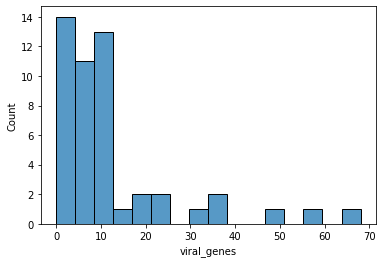

In [10]:
# histogram of viral gene numbers
sns.histplot(viral_genes['viral_genes'])

## Connection Strength

Proposed criteria: Adjusted inter connective linkage density >= 0.05 reads/kbp^2

In [19]:
inter = df[df['adjusted_inter_linkage_density'] >= 0.05]
print(len(inter), 'associations are >= 0.05, which is about', round(len(inter)/len(df)*100), '%.')

87 associations are >= 0.05, which is about 26 %.


In [23]:
ratio = df[df['adjusted_inter_vs_intra_ratio'] >= 2.5]
print(len(ratio), 'associations are >= 1, which is about', round(len(ratio)/len(df)*100), '%.')

88 associations are >= 1, which is about 26 %.


In [31]:
both = df[(df['adjusted_inter_linkage_density'] >= 0.05) & (df['adjusted_inter_vs_intra_ratio'] >= 2.5)]
both

,virus_name,virus_length,virus_read_count,virus_read_depth,virus_read_depth_in_host,host_name,host_length,host_read_count,host_read_depth,intra_read_count,...,translation_table,red_value,warnings,domain,phyla,class,order,family,genus,species
209,k141_3298423,5405,231,42.738205,15.114731,bin_110,155303,4643,29.896396,142,...,NaN,NaN,No bacterial or archaeal marker,Unclassified,NaN,NaN,NaN,NaN,NaN,NaN
286,k141_2834672,16753,366,21.846833,8.516562,bin_135,110072,2484,22.567047,106,...,NaN,NaN,No bacterial or archaeal marker,Unclassified,NaN,NaN,NaN,NaN,NaN,NaN


There are only 2 associations that have adjusted_inter_linkage_density >= 0.05 and adjusted_inter_vs_intra_ratio >= 2.5. So I recommend picking one of the criteria, not both.